In [51]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

In [52]:
netflix_data= pd.read_csv(r"C:\Users\MR HARRISON\Downloads\netflix_titles_nov_2019.csv")
netflix_data

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


In [ ]:
1.0. 
What different types of show or movie are uploaded on Netflix?

In [50]:
movies_category = netflix_data["type"].head(2)
movies_category

0    TV Show
1      Movie
Name: type, dtype: object

Text(0.5, 1.0, 'movies category.')

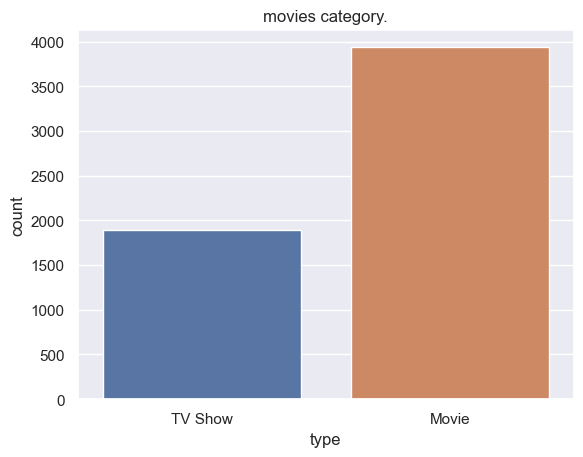

In [22]:
sns.countplot(x='type', data=netflix_data).set_title('movies category.')

In [ ]:
2.0 Correlation between the features

In [23]:
corr_data = netflix_data.corr()
corr_data

C:\Users\MR HARRISON\AppData\Local\Temp\ipykernel_2240\4096409141.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = netflix_data.corr()


,show_id,release_year
show_id,1.000000,0.536742
release_year,0.536742,1.000000


Text(0.5, 1.0, 'Correlation between features')

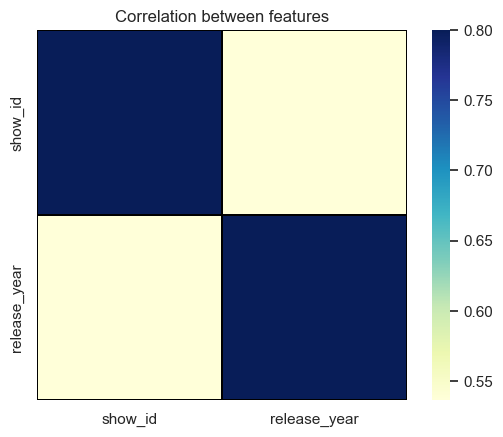

In [25]:
sns.heatmap(corr_data,vmax = 0.8 , linewidth = 0.01 ,square = True,cmap = 'YlGnBu',linecolor = 'black')
plt.title('Correlation between features')

In [ ]:
3.0 Most watched shows on the Netflix

In [28]:
most_watched_movies =netflix_data['title'].mode()
most_watched_movies

0      Limitless
1           Love
2    Oh My Ghost
3    The Silence
4         Tunnel
Name: title, dtype: object

In [ ]:
4.0 Distribution of Ratings

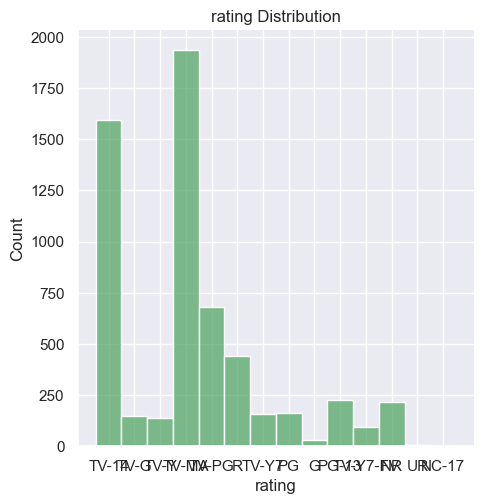

In [37]:
sns.displot(netflix_data['rating'],color = 'g')
plt.title("rating Distribution")
plt.show()

In [ ]:
5.0 Which has the highest rating Tv show or Movies

In [40]:
netflix_data['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [ ]:
6.0 Highest watched genres on Netflix

In [41]:
netflix_data['listed_in'].mode()

0    Documentaries
Name: listed_in, dtype: object

In [ ]:
7.0 Released movie over the years

In [45]:
netflix_data.groupby('release_year')['title'].count().sort_values(ascending=False)

release_year
2018    1040
2017     928
2016     818
2019     762
2015     502
        ... 
1956       1
1955       1
1954       1
1947       1
2020       1
Name: title, Length: 71, dtype: int64

In [ ]:
8.0 Finding the best Month for releasing content

In [54]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

In [56]:
netflix_data['Month'] = netflix_data['date_added'].dt.month

In [65]:
netflix_data.groupby('Month')['release_year'].count().sort_values(ascending=False)

Month
10.0    580
11.0    544
3.0     504
8.0     454
12.0    424
9.0     420
7.0     413
4.0     406
1.0     389
5.0     380
2.0     342
6.0     339
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Highest released months.')

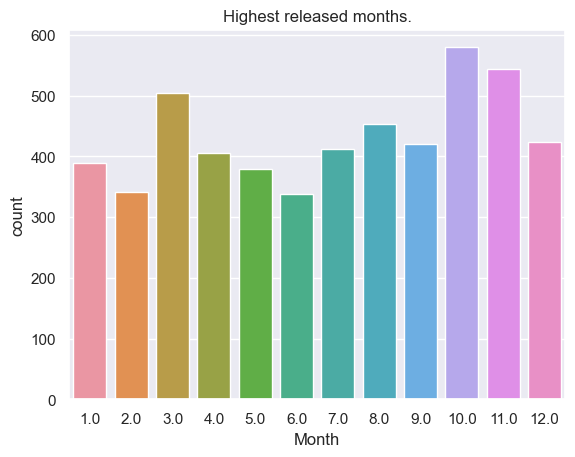

In [63]:
sns.countplot(x='Month', data=netflix_data).set_title('Highest released months.')